In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

plt.style.use('seaborn-poster')
%matplotlib inline

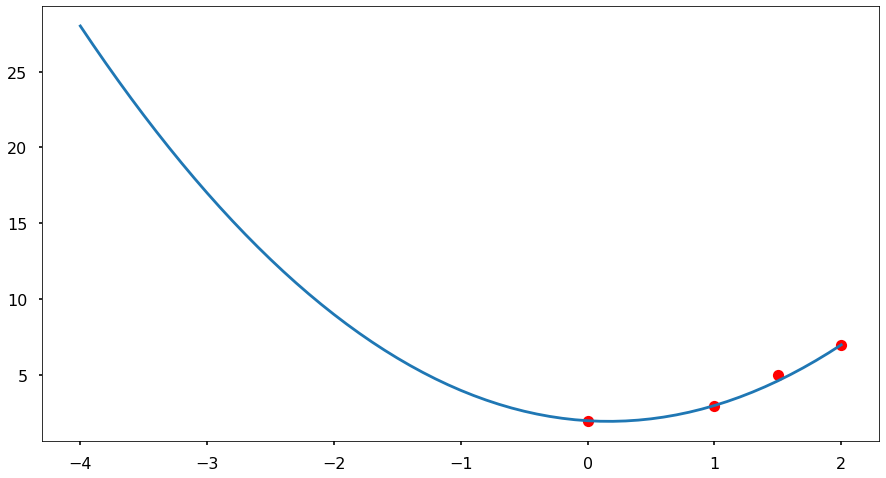

In [ ]:
def divided_diff(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:, 0] = y

  for j in range(1, n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):
      n = len(x_data) - 1
      p = coef[n]
      for k in range(1,n+1):
        p = coef[n-k]+(x -x_data[n-k])*p
      return p

x = np.array([0, 1, 2])
y = np.array([2, 3, 7])

a_s = divided_diff(x, y)[0, :]


f=interp1d(x,y)
y_hat =f(1.5)

x_new = np.arange(-4, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (15, 8))
plt.plot(x, y, 'ro')
plt.plot(1.5, y_hat, 'ro')
plt.plot(x_new, y_new)